In [1]:
%matplotlib inline

In [2]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_claudius #demo data

import pandas as pd
import glob
import numpy as np
#import surfe

In [3]:
data = pd.read_excel(r'C:\Users\ASUS\Desktop\loopstructural\data perthbasin\without_coord\perthbasin.xlsx')

In [4]:
data = data.rename(columns={'azimuth': 'strike', 'formation': 'feature_name'})

In [5]:
print(data)

                 X             Y            Z  val      strike       dip  \
0    393936.142320  6.693633e+06   957.702303    1  263.276747  1.193492   
1    396918.892567  6.693984e+06   977.204803    1   83.276747  0.349367   
2    351487.758871  6.688629e+06 -7385.646697    1   83.277000  6.546000   
3    338518.168564  6.650709e+06 -4542.306605    1  256.590252  1.789915   
4    397464.032464  6.663078e+06   959.378895    1  268.100891  1.432093   
..             ...           ...          ...  ...         ...       ...   
119  353033.649500  6.688811e+06 -5424.239697    5         NaN       NaN   
120  341942.065600  6.651525e+06 -4152.902105    5         NaN       NaN   
121  342823.407600  6.651735e+06 -4152.902105    5         NaN       NaN   
122  337375.397500  6.650011e+06 -1199.239105    5         NaN       NaN   
123  338177.661300  6.650617e+06 -1227.176105    5         NaN       NaN   

     polarity feature_name  
0         1.0      Permian  
1         1.0      Permian  


In [ ]:
data_claudius, bb_claudius = load_claudius()

In [ ]:
print(bb_claudius)

In [6]:
##extent_of_model = np.array([[ 340944.288072, 6637386.,  -7357.485252],
## [ 393936.142320,  6693633.,   957.702303]])

extent_of_model= np.array([[337000,6640000,-18000],  ##taken from extent of model in gempy
[400000,6710000,1000]])


In [7]:
print(extent_of_model[0,:])

[ 337000 6640000  -18000]


In [8]:
print(extent_of_model[1,:])

[ 400000 6710000    1000]


2021-10-15 12:28:41,369 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-10-15 12:28:41,369 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-10-15 12:28:41,369 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.



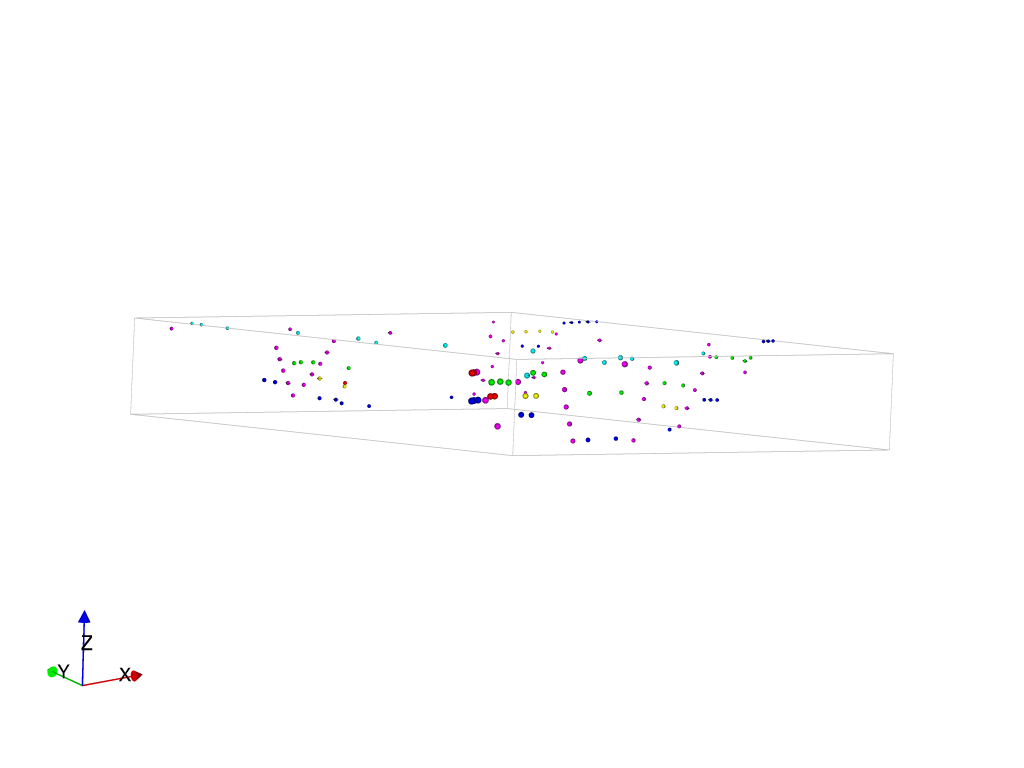

In [9]:
data['feature_name'].unique()

viewer = LavaVuModelViewer(background='white')
viewer.add_value_data(data[~np.isnan(data['val'])][['X','Y','Z']],data[~np.isnan(data['val'])]['val'],name='value points')
viewer.add_vector_data(data[~np.isnan(data['dip'])][['X','Y','Z']],
                       data[~np.isnan(data['strike'])][['X','Y','Z']],name='orientation points')
viewer.rotate([-85.18760681152344, 42.93233871459961, 0.8641873002052307])
viewer.display()

In [ ]:


model = GeologicalModel(extent_of_model[0,:],extent_of_model[1,:])
model.set_model_data(data)




formation_Permian = model.create_and_add_foliation('Permian',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )

#uc = model.add_unconformity(formation_Permian,1)






formation_Cretaceous   =    model.create_and_add_foliation('Cretaceous',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )





formation_Yarragadee  =    model.create_and_add_foliation('Yarragadee',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )



formation_Lesueur   =     model.create_and_add_foliation('Lesueur',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )




formation_Eneabba   =   model.create_and_add_foliation('Eneabba',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )




model.update()


In [ ]:
#model.update()

viewer = LavaVuModelViewer(model)


viewer.add_isosurface(formation_Permian,
#                       nslices=5
                     colour = 'blue'
                     ) ##slices=[2,1.5,1],





viewer.add_isosurface(formation_Cretaceous,
#                       nslices=5,
                      colour = 'red'
                     )


viewer.add_isosurface(formation_Yarragadee,
#                       nslices=5
                   colour = 'yellow'
                  )


viewer.add_isosurface(formation_Lesueur,
#                       nslices=5
                      colour = 'brown'
                     )



viewer.add_isosurface(formation_Eneabba,
#                       nslices=5
                      
                     paint_with=formation_Eneabba)


viewer.rotate([-85.18760681152344, -42.93233871459961, 0.8641873002052307])
viewer.display()


In [ ]:
viewer.rotate([-175.18760681152344, -42.93233871459961, 0.8641873002052307])
viewer.display()

In [ ]:
viewer.rotate([85.18760681152344, -42.93233871459961, -0.8641873002052307])
viewer.display()

In [ ]:
viewer.rotate([85.18760681152344, -42.93233871459961, 0.8641873002052307])
viewer.display()

In [ ]:
viewer.rotate([-85.18760681152344, -42.93233871459961, -0.8641873002052307])
viewer.display()

In [13]:
def view_model(model):
    
    viewer = LavaVuModelViewer(model)


    viewer.add_isosurface(formation_Permian,
#                       nslices=5
                     colour = 'blue'
                     ) ##slices=[2,1.5,1],





    viewer.add_isosurface(formation_Cretaceous,
#                       nslices=5,
                      colour = 'red'
                     )


    viewer.add_isosurface(formation_Yarragadee,
#                       nslices=5
                   colour = 'yellow'
                  )


    viewer.add_isosurface(formation_Lesueur,
#                       nslices=5
                      colour = 'brown'
                     )



    viewer.add_isosurface(formation_Eneabba,
#                       nslices=5
                      
                     paint_with=formation_Eneabba)


    viewer.rotate([-85.18760681152344, -42.93233871459961, 0.8641873002052307])
    viewer.display()
    viewer.rotate([85.18760681152344, -42.93233871459961, -0.8641873002052307])
    viewer.display()
    return

C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-10-15 12:32:28,443 ~ LoopS


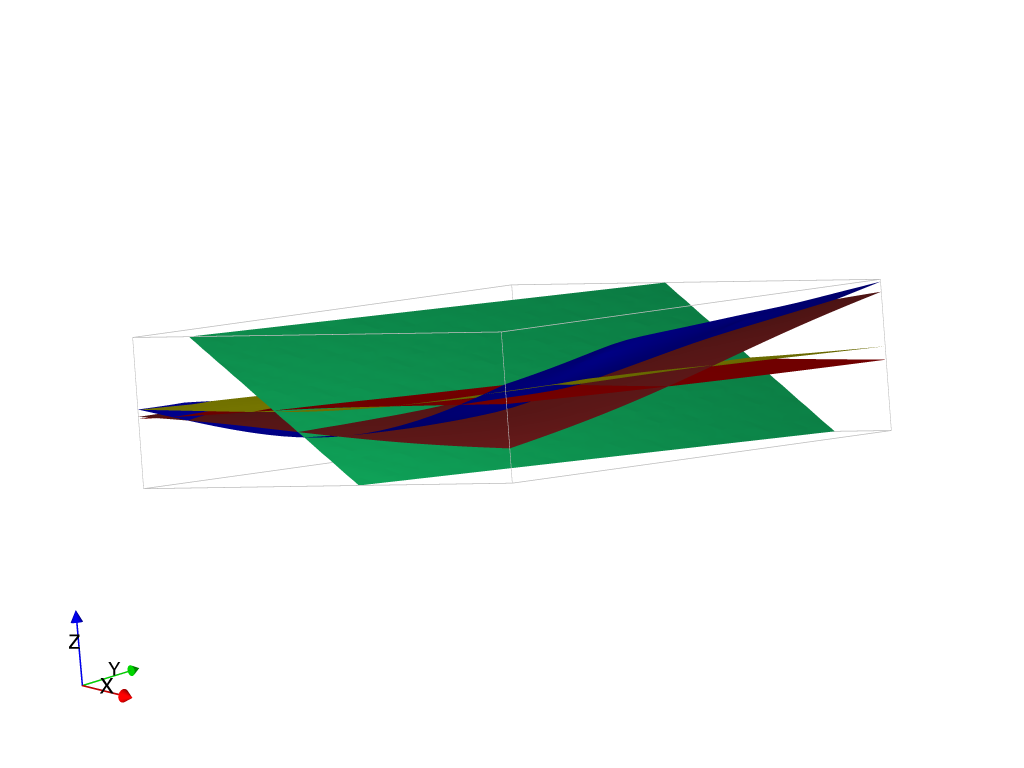


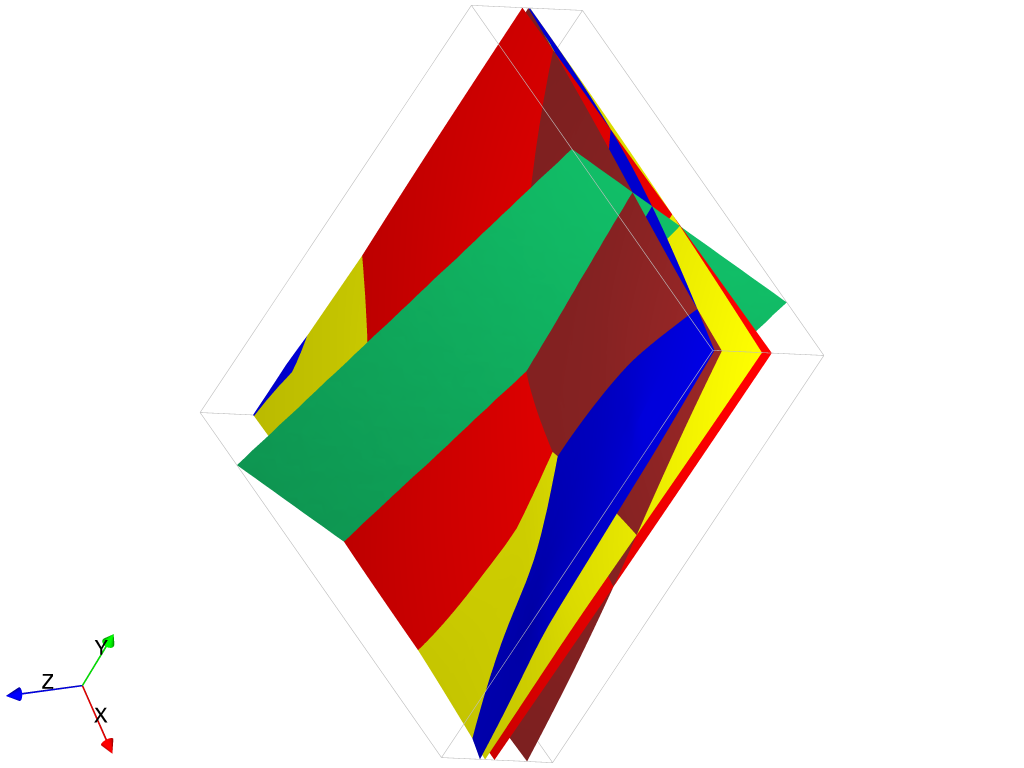

2021-10-15 12:33:46,752 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:33:46,752 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:33:49,224 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:33:49,224 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:33:51,798 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:33:51,798 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:33:54,370 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:33:54,370 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg


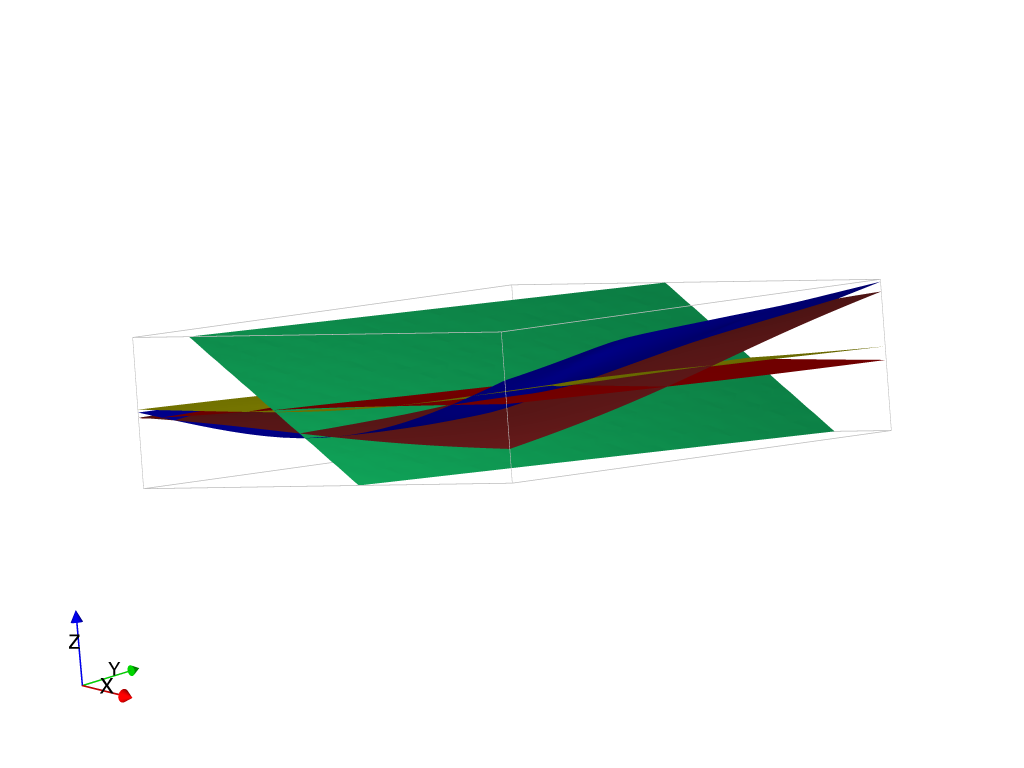


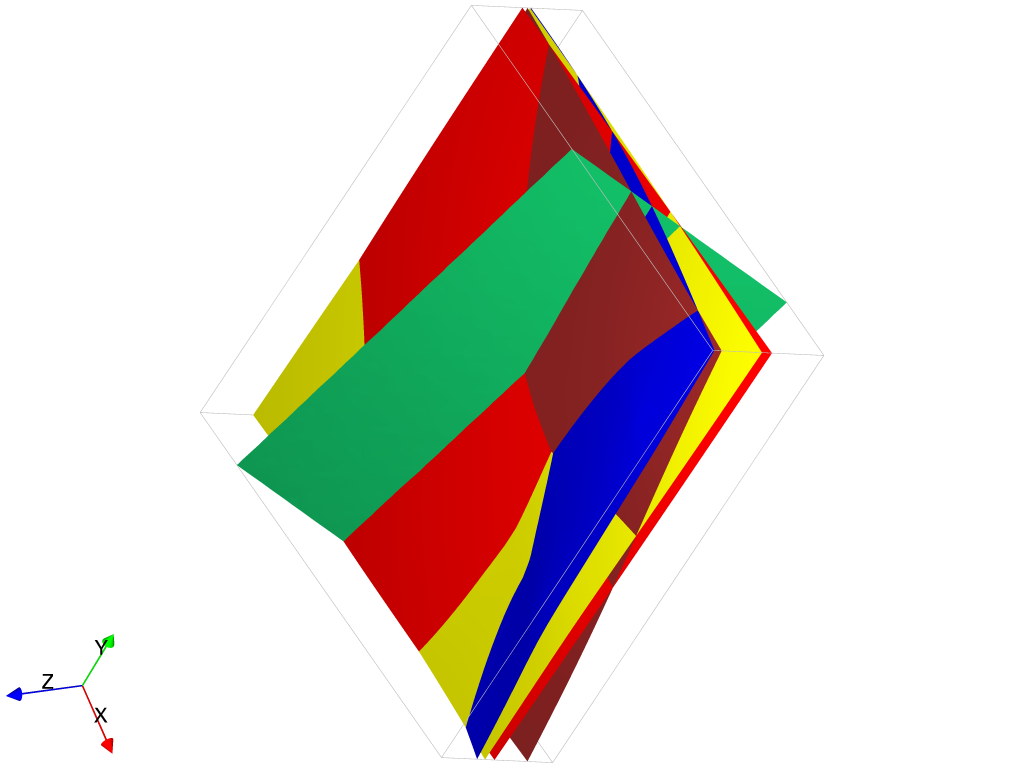

2021-10-15 12:35:00,959 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:35:00,959 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:35:03,306 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:35:03,306 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:35:05,820 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:35:05,820 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:35:08,370 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:35:08,370 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg


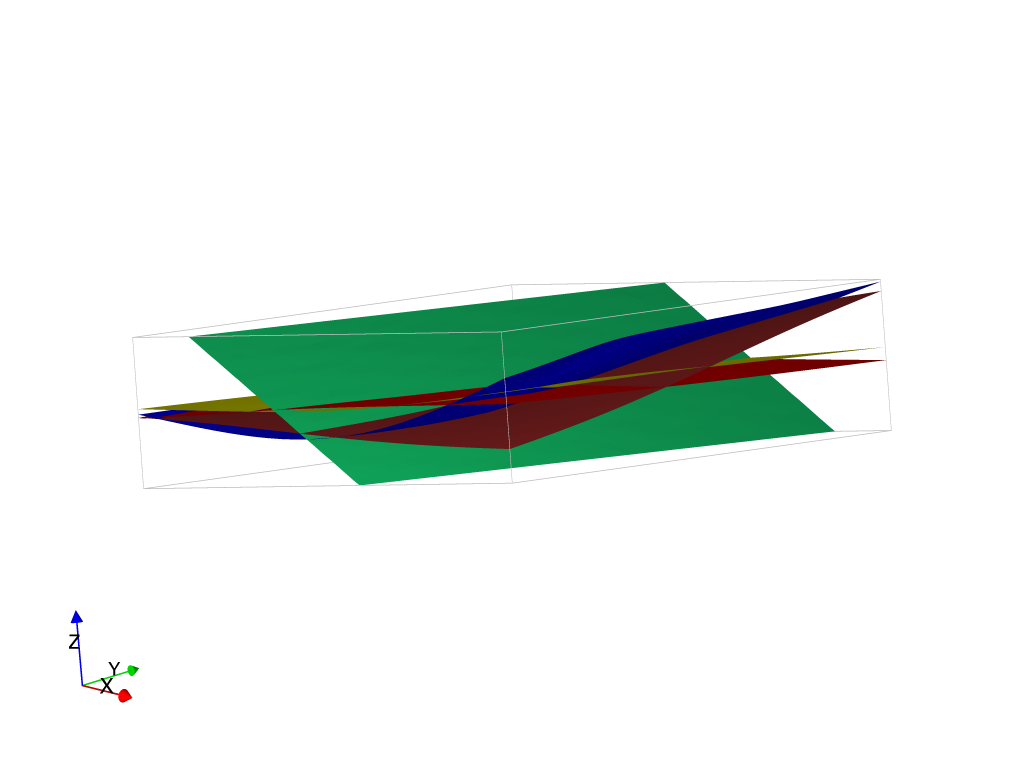


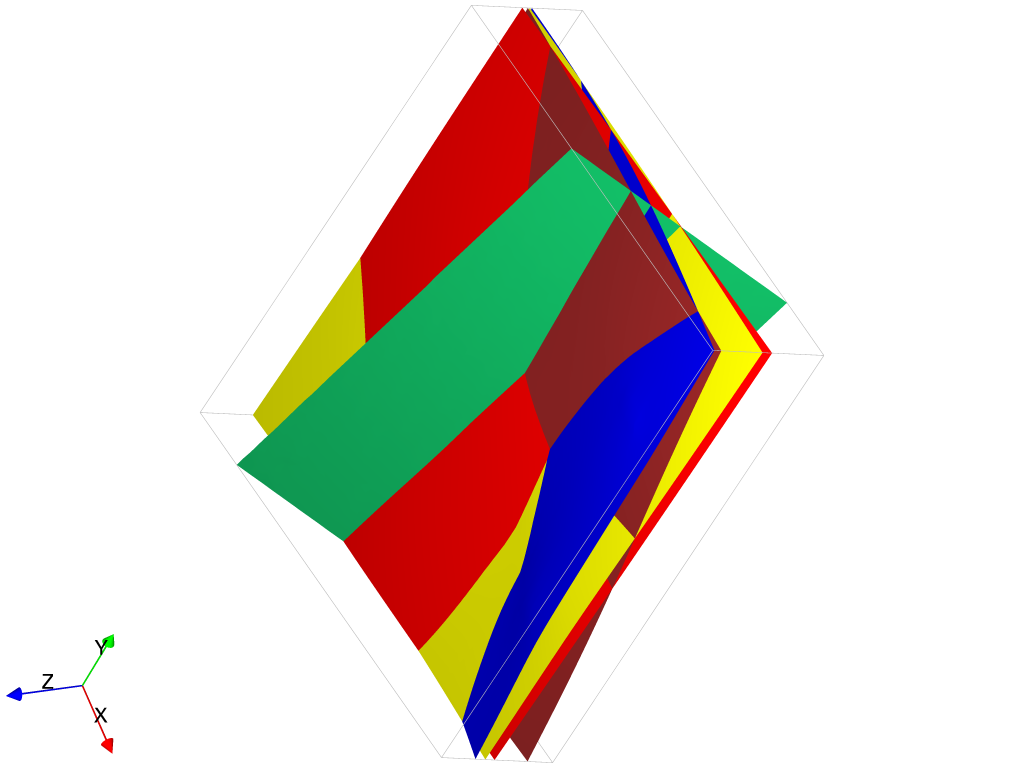

2021-10-15 12:36:15,462 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:36:15,462 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:36:17,804 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:36:17,804 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:36:20,560 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:36:20,560 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:36:23,070 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:36:23,070 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg


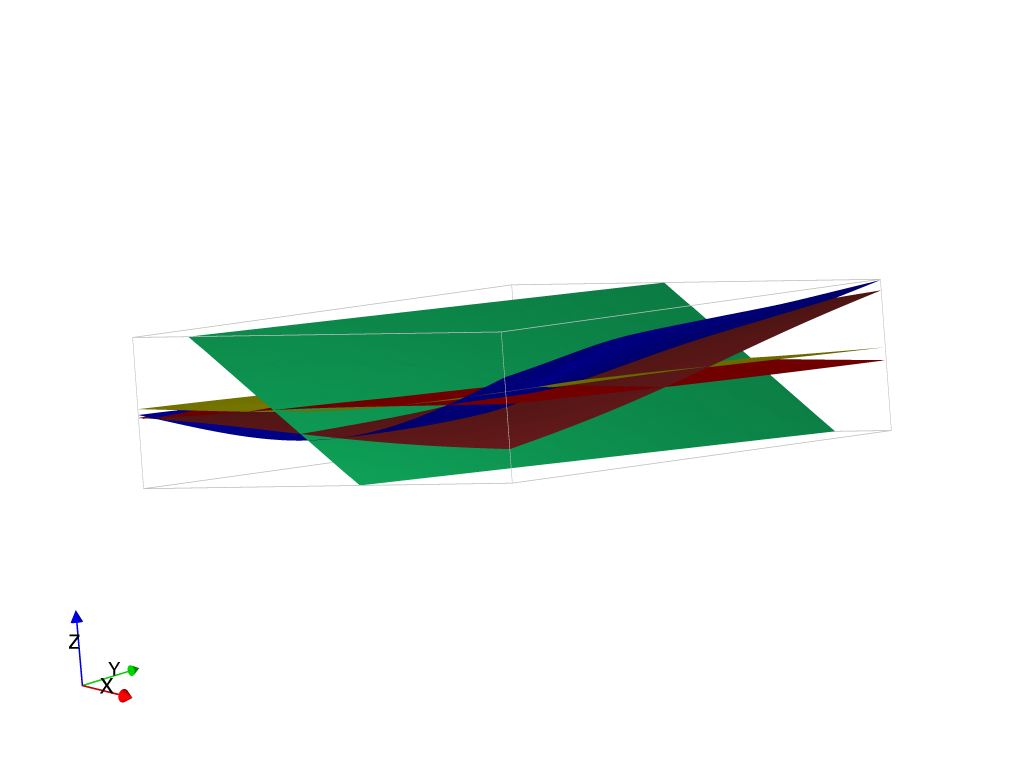


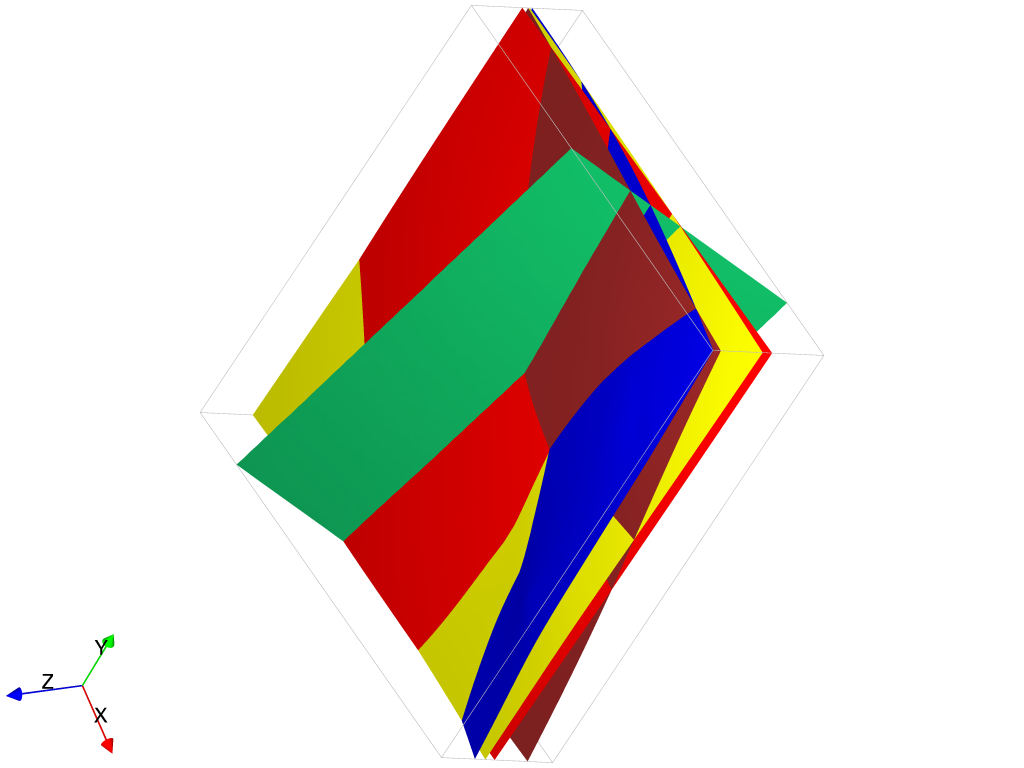

2021-10-15 12:37:30,690 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:37:30,690 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:37:33,193 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:37:33,193 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:37:35,593 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:37:35,593 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:37:38,159 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:37:38,159 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg


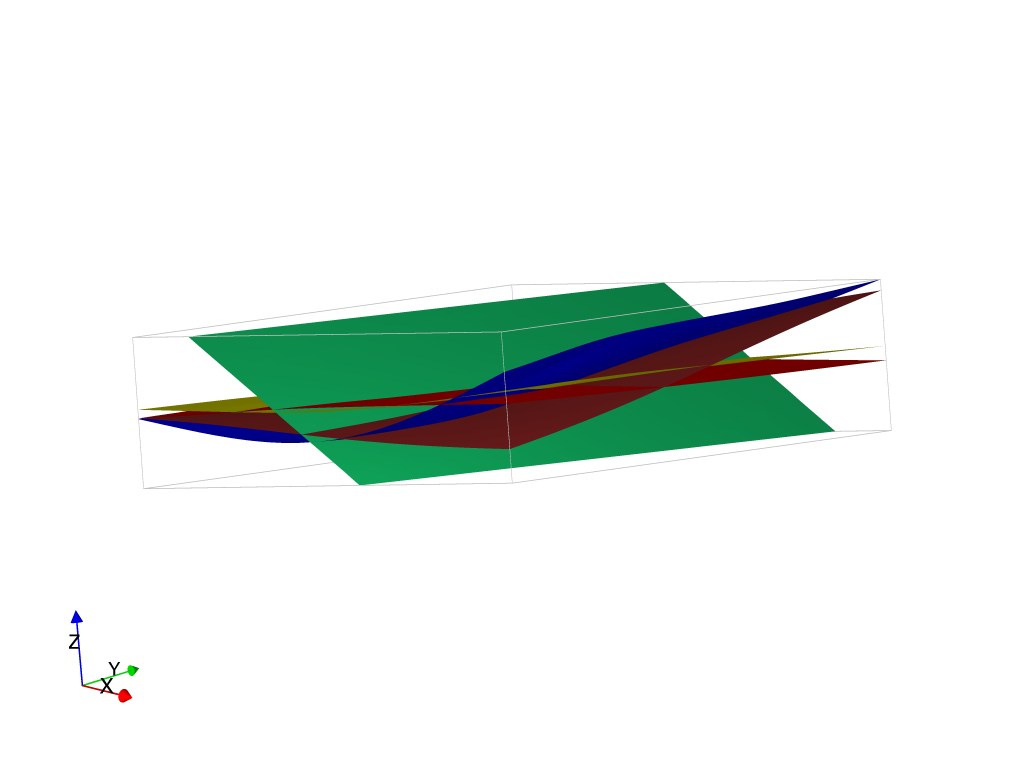


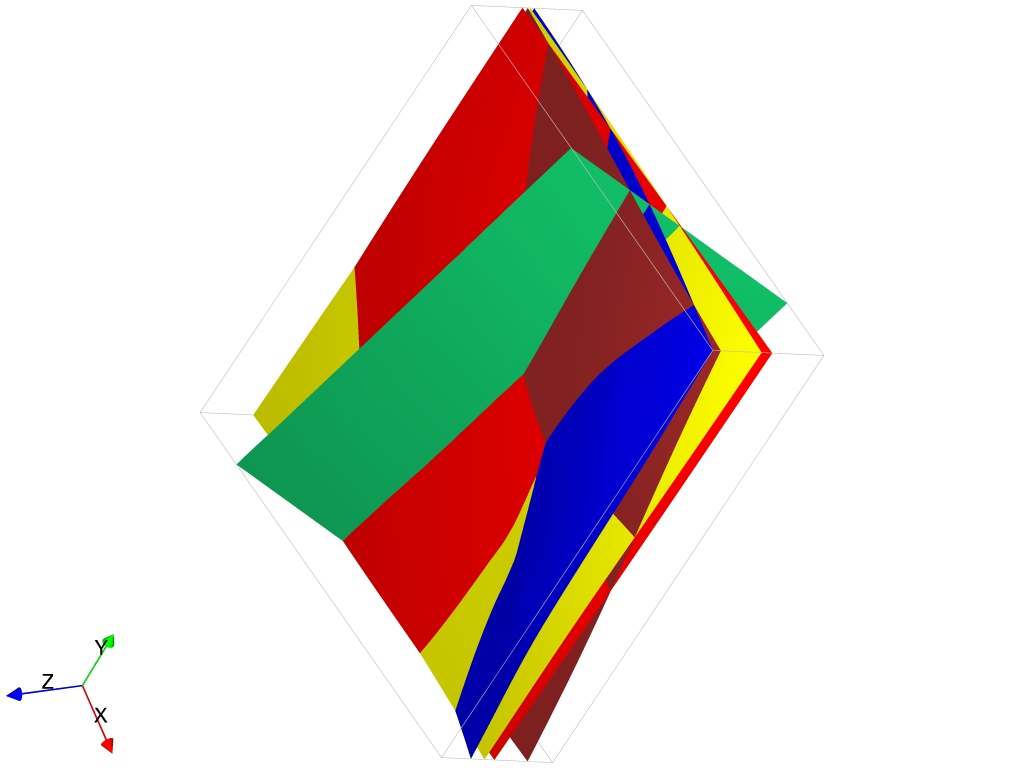

2021-10-15 12:38:50,484 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:38:50,484 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:38:52,878 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:38:52,878 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:38:55,702 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:38:55,702 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:38:58,475 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-15 12:38:58,475 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg


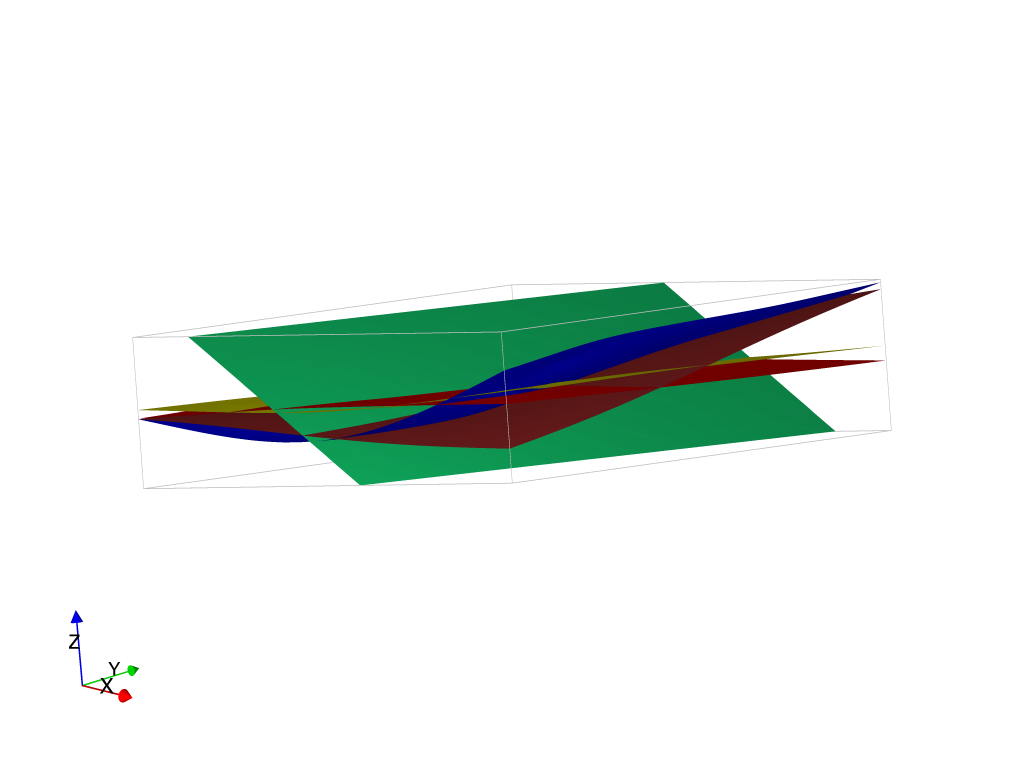


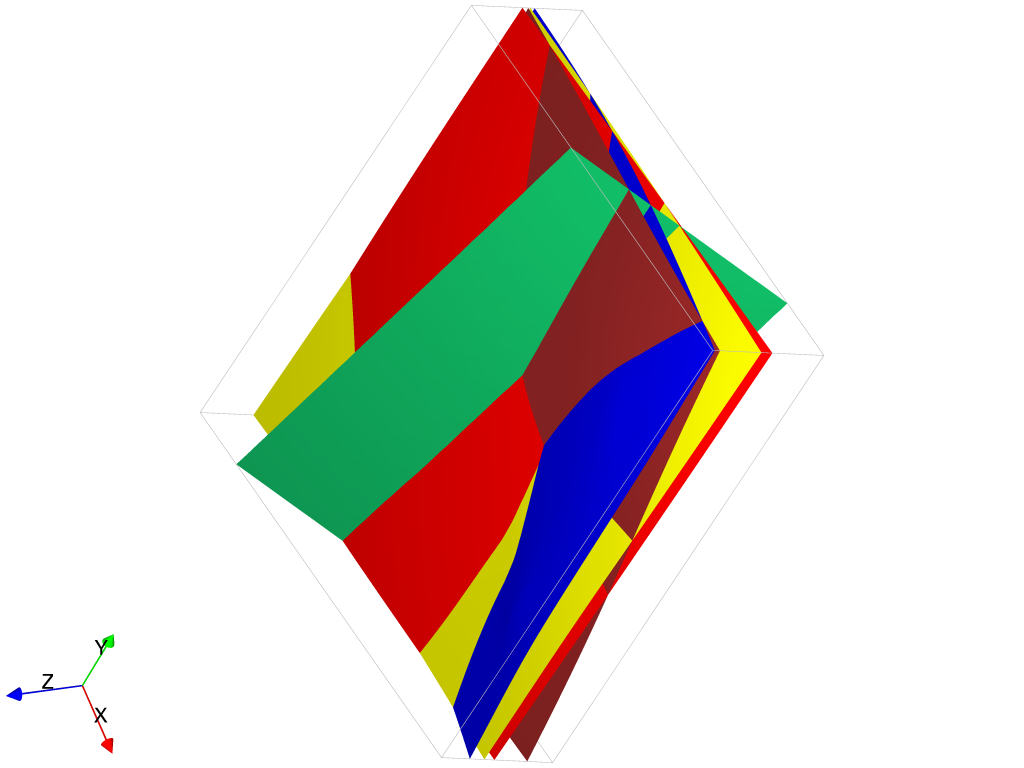

In [14]:
import pickle
#approach one
#assign uncertainty by looping through surfaces
surfaces = np.unique(data['feature_name'])

#mode = 1 -> uncertainties in x,y,z
#mode = 2 -> uncertainties in orientations
#mode = 3 -> combination

n_iterations = 6
np.random.seed(3)
lith_blocks = np.array([])

for iteration in range(n_iterations):
    for surf in surfaces:
        variance_z = np.random.normal(-500,500)
        variance_x = np.random.normal(-500,500)
        variance_y = np.random.normal(-500,500)
        data['Z'][data['feature_name'] == surf] = data['Z'][data['feature_name'] == surf] + variance_z
        data['X'][data['feature_name'] == surf] = data['X'][data['feature_name'] == surf] + variance_x
        data['Y'][data['feature_name'] == surf] = data['Y'][data['feature_name'] == surf] + variance_y
    
    

    

    #fault_displacement = 500

    model = GeologicalModel(extent_of_model[0,:],extent_of_model[1,:])
    model.set_model_data(data)


    

    formation_Permian = model.create_and_add_foliation('Permian',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )

     #uc = model.add_unconformity(formation_Permian,1)




    



    formation_Cretaceous   =    model.create_and_add_foliation('Cretaceous',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )


   


    formation_Yarragadee  =    model.create_and_add_foliation('Yarragadee',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )

   


    formation_Lesueur   =     model.create_and_add_foliation('Lesueur',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )


    


    formation_Eneabba   =   model.create_and_add_foliation('Eneabba',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )

    
    
    model_new = model
    
    view_model(model_new)
   # file_to_store = open(f"{iteration}.pickle", "wb")
   # pickle.dump(model_new, file_to_store)
   # file_to_store.close()
  